In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import normalize

# Importação e Tratamento de Dados
Antes de importar os dados alguns ajustes manuais foram realizados diretamente nos arquivos:
- Ocorria um bug quado coluna Type = etc.
    - Foi preciso substituir 'etc.,,' por 'etc.,'
- Ocorria um bug quando coluna LandShape = Flag-shaped etc. e FrontageIsGreaterFlag = False em seguida
    - O valor de Frontage desaparecia então preciso incluir ",," no meio destas
- Algumas linhas começavam e terminavam com "
    - " removidas
- Valores com "" não eram lidos corretamente
    - Foram trocados por "

In [2]:
df_train = pd.read_csv('./data/train_houses 1(in).csv', engine='python')
df_test = pd.read_csv('./data/test_houses 1(in).csv', engine='python')

In [3]:
pd.options.display.max_columns = None

# Visualização de vazios na tabela de treino
Baseado nos metadados e valores faltantes, algumas colunas foram removidas

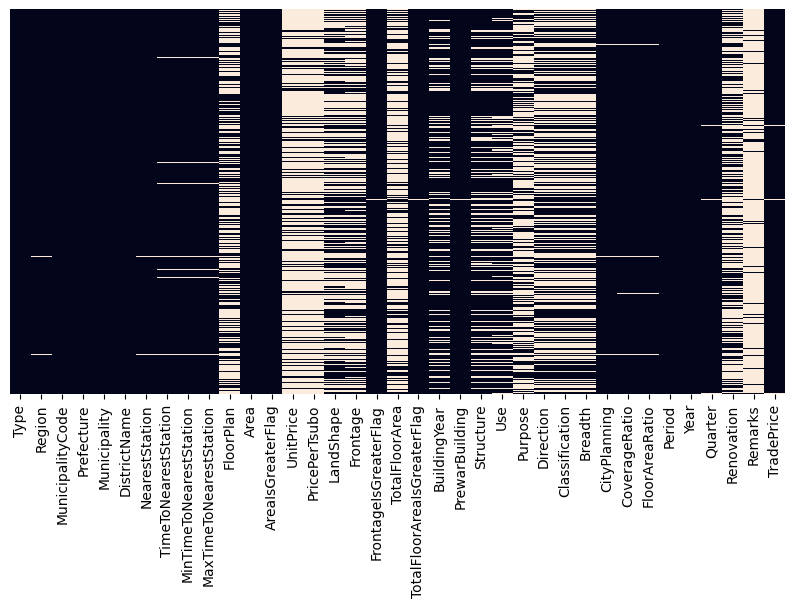

In [4]:
plt.figure(figsize=(10,5))

sns.heatmap(df_train.isnull(), cbar=False, yticklabels=False);

In [5]:
df_train.head(10)

,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,MaxTimeToNearestStation,FloorPlan,Area,AreaIsGreaterFlag,UnitPrice,PricePerTsubo,LandShape,Frontage,FrontageIsGreaterFlag,TotalFloorArea,TotalFloorAreaIsGreaterFlag,BuildingYear,PrewarBuilding,Structure,Use,Purpose,Direction,Classification,Breadth,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks,TradePrice
0,Pre-owned Condominiums,etc.,13103,Tokyo,Minato Ward,Kaigan,Takeshiba,1,1.0,1.0,1K,35,0,NaN,NaN,NaN,NaN,False,NaN,0.0,1979.0,0,SRC,House,NaN,NaN,NaN,NaN,Quasi-industrial Zone,60.0,400.0,1st quarter 2011,2011,1.0,Done,NaN,24000000.0
1,Residential Land(Land and Building),Residential Area,13120,Tokyo,Nerima Ward,Nishiki,Kamiitabashi,15,15.0,15.0,NaN,110,0,NaN,NaN,Semi-rectangular Shaped,12.0,False,105.0,0.0,2013.0,0,W,House,NaN,East,Private Road,4.0,Category I Exclusively Low-story Residential Zone,60.0,200.0,3rd quarter 2013,2013,3.0,NaN,Dealings including private road,51000000.0
2,Residential Land(Land Only),Residential Area,13201,Tokyo,Hachioji City,Shimoongatamachi,Takao (Tokyo),1H-1H30,60.0,90.0,NaN,135,0,100000.0,340000.0,Irregular Shaped,10.0,False,NaN,0.0,NaN,0,NaN,NaN,NaN,East,Private Road,4.5,Category I Exclusively Low-story Residential Zone,40.0,80.0,4th quarter 2007,2007,4.0,NaN,NaN,14000000.0
3,Pre-owned Condominiums,etc.,13208,Tokyo,Chofu City,Kamiishiwara,Nishichofu,16,16.0,16.0,3LDK,60,0,NaN,NaN,NaN,NaN,False,NaN,0.0,1999.0,0,RC,House,Other,NaN,NaN,NaN,Quasi-industrial Zone,60.0,200.0,2nd quarter 2015,2015,2.0,Not yet,NaN,23000000.0
4,Residential Land(Land Only),Residential Area,13117,Tokyo,Kita Ward,Shimo,Shimo,6,6.0,6.0,NaN,60,0,550000.0,1800000.0,Trapezoidal Shaped,8.0,False,NaN,0.0,NaN,0,NaN,NaN,House,Southwest,Ward Road,4.5,Category I Exclusively Medium-high Residential...,60.0,200.0,4th quarter 2015,2015,4.0,NaN,NaN,33000000.0
5,Residential Land(Land and Building),Residential Area,13208,Tokyo,Chofu City,Kamiishiwara,Nishichofu,10,10.0,10.0,NaN,110,0,NaN,NaN,Semi-rectangular Shaped,7.8,False,90.0,0.0,2008.0,0,W,House,NaN,North,City Road,4.5,Category I Exclusively Low-story Residential Zone,40.0,80.0,1st quarter 2009,2009,1.0,NaN,NaN,42000000.0
6,Pre-owned Condominiums,etc.,13110,Tokyo,Meguro Ward,Minami,Ookayama,11,11.0,11.0,1K,15,0,NaN,NaN,NaN,NaN,False,NaN,0.0,1991.0,0,RC,House,House,NaN,NaN,NaN,Category I Exclusively Low-story Residential Zone,60.0,150.0,3rd quarter 2017,2017,3.0,Not yet,NaN,7000000.0
7,Residential Land(Land and Building),Residential Area,13115,Tokyo,Suginami Ward,Shoan,Kugayama,14,14.0,14.0,NaN,85,0,NaN,NaN,Rectangular Shaped,7.0,False,80.0,0.0,1997.0,0,W,House,NaN,Northeast,Agricultural Road,4.0,Category II Exclusively Low-story Residential ...,60.0,150.0,1st quarter 2014,2014,1.0,NaN,NaN,53000000.0
8,Residential Land(Land Only),Residential Area,13222,Tokyo,Higashikurume City,Saiwaicho,Kiyose,21,21.0,21.0,NaN,110,0,180000.0,590000.0,Semi-trapezoidal Shaped,10.0,False,NaN,0.0,NaN,0,NaN,NaN,House,East,City Road,5.1,Category I Exclusively Low-story Residential Zone,40.0,80.0,2nd quarter 2016,2016,2.0,NaN,NaN,20000000.0
9,Residential Land(Land Only),Residential Area,13112,Tokyo,Setagaya Ward,Komazawa,Komazawadaigaku,16,16.0,16.0,NaN,90,0,870000.0,2900000.0,Rectangular Shaped,6.4,False,NaN,0.0,NaN,0,NaN,NaN,NaN,Southeast,Ward Road,6.0,Category I Exclusively Low-story Residential Zone,60.0,150.0,2nd quarter 2007,2007,2.0,NaN,NaN,80000000.0


In [6]:
df_train = df_train.drop(
    columns=['MunicipalityCode', 'TimeToNearestStation', 'FloorPlan', 'AreaIsGreaterFlag', 'UnitPrice', 'PricePerTsubo',
        'LandShape', 'Frontage', 'TotalFloorArea', 'BuildingYear', 'Structure', 'Purpose', 'Breadth',
        'Period', 'Renovation', 'Remarks'])
df_test = df_test.drop(
    columns=['MunicipalityCode', 'TimeToNearestStation', 'FloorPlan', 'AreaIsGreaterFlag', 'UnitPrice', 'PricePerTsubo',
        'LandShape', 'Frontage', 'TotalFloorArea', 'BuildingYear','Structure', 'Purpose', 'Breadth',
        'Period', 'Renovation', 'Remarks'])

# Target vazio
Não faz sentido manter campos em que o valor target não existe

In [7]:
df_test = df_train.dropna(subset=['TradePrice'])

In [12]:
# Nova visualização de vazios na tabela de treino

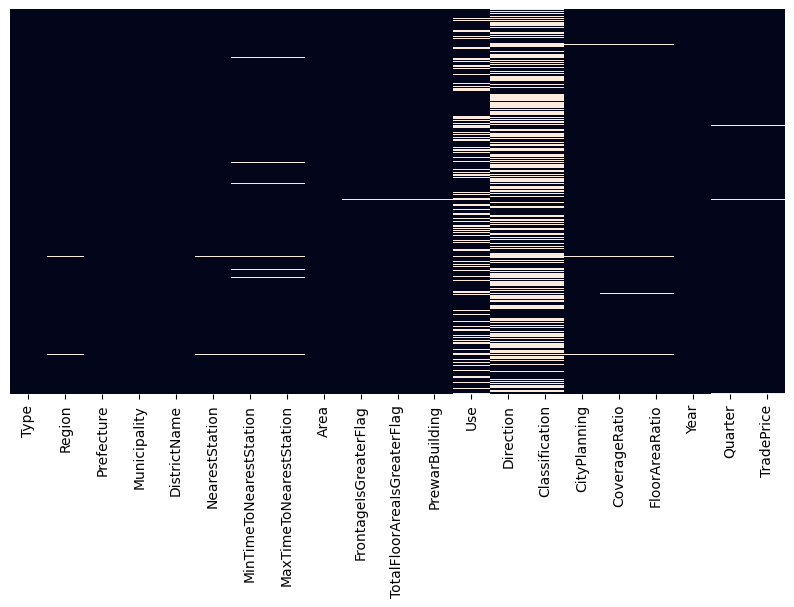

In [8]:
plt.figure(figsize=(10,5))

sns.heatmap(df_train.isnull(), cbar=False, yticklabels=False);

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325260 entries, 0 to 325259
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Type                         325260 non-null  object 
 1   Region                       324845 non-null  object 
 2   Prefecture                   325260 non-null  object 
 3   Municipality                 325260 non-null  object 
 4   DistrictName                 325053 non-null  object 
 5   NearestStation               323913 non-null  object 
 6   MinTimeToNearestStation      317002 non-null  float64
 7   MaxTimeToNearestStation      316879 non-null  float64
 8   Area                         325260 non-null  int64  
 9   FrontageIsGreaterFlag        324746 non-null  object 
 10  TotalFloorAreaIsGreaterFlag  324712 non-null  float64
 11  PrewarBuilding               324731 non-null  object 
 12  Use                          246737 non-null  object 
 13 

In [10]:
col_number = ['MinTimeToNearestStation', 'MaxTimeToNearestStation', 'Area',
              'CoverageRatio', 'FloorAreaRatio', 'Year', 'Quarter']
col_object = ['Type', 'Region', 'Prefecture', 'Municipality', 'DistrictName',
              'NearestStation', 'Use', 'Direction', 'Classification', 'CityPlanning']
col_bool = ['FrontageIsGreaterFlag', 'TotalFloorAreaIsGreaterFlag', 'PrewarBuilding']

In [11]:
df_train.FloorAreaRatio = df_train.FloorAreaRatio.apply(float)
df_test.FloorAreaRatio = df_test.FloorAreaRatio.apply(float)

for col in col_number:
    print(col)
    df_train[col] = df_train[col].fillna(np.mean(df_train[col].dropna()))
    df_test[col] = df_test[col].fillna(np.mean(df_test[col].dropna()))

ValueError: could not convert string to float: '4th quarter 2012'

In [ ]:
df_train[col_object] = df_train[col_object].fillna('unknown')
df_test[col_object] = df_test[col_object].fillna('unknown')

In [ ]:
df_train['FrontageIsGreaterFlag'] = df_train['FrontageIsGreaterFlag'].apply(
    lambda x: 1.0 if x == 'True' else 0.0
)
df_train['PrewarBuilding'] = df_train['PrewarBuilding'].apply(float)

df_test['FrontageIsGreaterFlag'] = df_test['FrontageIsGreaterFlag'].apply(
    lambda x: 1.0 if x == 'True' else 0.0
)
df_test['PrewarBuilding'] = df_test['PrewarBuilding'].apply(float)

In [ ]:
df_train_number = normalize(df_train[col_number])
df_test_number = normalize(df_test[col_number])

In [ ]:
def custom_combiner(feature, category):
    return str(feature) + "_" + str(category)

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore', feature_name_combiner=custom_combiner)
enc.fit(df_train[col_object])
df_train_object = enc.transform(df_train[col_object]).toarray()
df_test_object = enc.transform(df_test[col_object]).toarray()

In [ ]:
X_train_number = pd.DataFrame(data=df_train_number, columns=col_number)
X_train_object = pd.DataFrame(data=df_train_object, columns=enc.get_feature_names_out())
X_train_bool = df_train[col_bool]

X_test_number = pd.DataFrame(data=df_test_number, columns=col_number)
X_test_object = pd.DataFrame(data=df_test_object, columns=enc.get_feature_names_out())
X_test_bool = df_test[col_bool]

y_train = df_train.TradePrice

In [ ]:
len(X_train_number), len(X_train_object), len(X_train_bool)

(323546, 323546, 323546)

In [ ]:
X_train_number.head()

,MinTimeToNearestStation,MaxTimeToNearestStation,Area,CoverageRatio,FloorAreaRatio,Year,Quarter
0,0.000487,0.000487,0.017060,0.029246,0.194972,0.980224,0.000487
1,0.007400,0.007400,0.054270,0.029602,0.098673,0.993142,0.001480
2,0.029756,0.044633,0.066950,0.019837,0.039674,0.995323,0.001984
3,0.007894,0.007894,0.029603,0.029603,0.098677,0.994175,0.000987
4,0.002960,0.002960,0.029605,0.029605,0.098683,0.994227,0.001974


In [ ]:
X_train_object.head()

Type_Agricultural Land  Type_Forest Land  Type_Pre-owned Condominiums  \
0                     0.0               0.0                          1.0   
1                     0.0               0.0                          0.0   
2                     0.0               0.0                          0.0   
3                     0.0               0.0                          1.0   
4                     0.0               0.0                          0.0   

   Type_Residential Land(Land Only)  Type_Residential Land(Land and Building)  \
0                               0.0                                       0.0   
1                               0.0                                       1.0   
2                               1.0                                       0.0   
3                               0.0                                       0.0   
4                               1.0                                       0.0   

   Region_ etc.  Region_Commercial Area  Region_Industrial Area  \
0           1.0                     0.0                     0.0   
1           0.0                     0.0                     0.0   
2           0.0                     0.0                     0.0   
3           1.0                     0.0                     0.0   
4           0.0                     0.0                     0.0   

   Region_Potential Residential Area  Region_Residential Area  Region_unknown  \
0                                0.0                      0.0             0.0   
1                                0.0                      1.0             0.0   
2                                0.0                      1.0             0.0   
3                                0.0                      0.0             0.0   
4                                0.0                      1.0             0.0   

   Prefecture_Tokyo  Municipality_Adachi Ward  Municipality_Akiruno City  \
0               1.0                       0.0                        0.0   
1               1.0                       0.0                        0.0   
2               1.0                       0.0                        0.0   
3               1.0                       0.0                        0.0   
4               1.0                       0.0                        0.0   

   Municipality_Akishima City  Municipality_Arakawa Ward  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   Municipality_Bunkyo Ward  Municipality_Chiyoda Ward  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   

   Municipality_Chofu City  Municipality_Chuo Ward  Municipality_Edogawa Ward  \
0                      0.0                     0.0                        0.0   
1                      0.0                     0.0                        0.0   
2                      0.0                     0.0                        0.0   
3                      1.0                     0.0                        0.0   
4                      0.0                     0.0                        0.0   

   Municipality_Fuchu City  Municipality_Fussa City  \
0                      0.0                      0.0   
1                      0.0                      0.0   
2                      0.0                      0.0   
3                      0.0                      0.0   
4                      0.0                      0.0   

   Municipality_Hachijo Town  Municipality_Hachioji City  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2   

In [ ]:
X_train_bool.head()

,FrontageIsGreaterFlag,TotalFloorAreaIsGreaterFlag,PrewarBuilding
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [ ]:
X_train = pd.concat([X_train_number, X_train_object, X_train_bool], axis=1).dropna()
X_test = pd.concat([X_test_number, X_test_object, X_test_bool], axis=1).dropna()

In [ ]:
X_train.to_csv('./data_transformed/X_train.csv')
X_test.to_csv('./data_transformed/X_test.csv')
y.to_csv('./data_transformed/y.csv')

KeyboardInterrupt: 